# Compute the sensitivity of SHiP to the scalar portal

In [1]:
]st

Status `~/Documents/Research/Projects/SensCalc/Code/SensMC/Project.toml`
  [864edb3b] DataStructures v0.18.13
⌃ [31c24e10] Distributions v0.25.86
⌃ [e9467ef8] GLMakie v0.8.2
⌃ [5c1252a2] GeometryBasics v0.4.6
  [7073ff75] IJulia v1.24.0
⌃ [682c06a0] JSON v0.21.3
  [3f54b04b] LorentzVectors v0.4.3
  [ea0cff06] MDBM v0.1.6 `https://github.com/JLTastet/MDBM.jl#3788144`
⌅ [ee78f7c6] Makie v0.19.2
  [c03570c3] Memoize v0.4.4
  [e1d29d7a] Missings v1.1.0
  [3b2b4ff1] Multisets v0.4.4
⌃ [bac558e1] OrderedCollections v1.4.1
  [c46f51b8] ProfileView v1.7.1
  [438e738f] PyCall v1.95.1
  [d330b81b] PyPlot v2.11.1
⌃ [f2b01f46] Roots v2.0.10
⌃ [90137ffa] StaticArrays v1.5.18
⌅ [2913bbd2] StatsBase v0.33.21
  [8ba89e20] Distributed
  [37e2e46d] LinearAlgebra
  [1a1011a3] SharedArrays
Info Packages marked with ⌃ and ⌅ have new versions available, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


In [2]:
using Random
Random.seed!(19694);

In [3]:
include("$(@__DIR__)/../lib/IncludeAll.jl")
include("$(@__DIR__)/../scripts/GenerateEvents.jl")
include("$(@__DIR__)/../scripts/ScanSensitivity.jl");

  Activating project at `~/Documents/Research/Projects/SensCalc/Code/SensMC`


In [4]:
@time mS, θ, debug = find_scalar_portal_sensitivity_mdbm(
    range(log10(0.1), log10(5), length=25),
    range(-6.5, -1, length=12), (1., 0.),
    2e20, :fairship_beauty, ["B -> S pi", "B -> S K?"],
    SHiP_geometry_ECN3;
    target_atomic_weight=96., # Molybdenum target
    iterations=3, Nsamples=8000000, CL=0.9,
    acceptance=:two_tracks_zero_charge,
    meson_spectrums_root="$(@__DIR__)/../data/FairShip")

┌ Warning: Reached the end of the meson list, looping back. This may violate the i.i.d. assumption.
└ @ Main ~/Documents/Research/Projects/SensCalc/Code/SensMC/scripts/GenerateEvents.jl:50


26776.429922 seconds (190.42 G allocations: 8.922 TiB, 2.51% gc time, 0.02% compilation time: 5% of which was recompilation)


([0.10101212722490657, 0.10308128398620305, 0.10533882247452134, 0.10519389358603679, 0.10749820988847218, 0.10734915298318042, 0.10969980060099006, 0.10954720866666724, 0.11194806890500811, 0.11179191471202109  …  4.781765119439239, 4.788431259180546, 4.791788491267192, 4.79038795134438, 4.784030571749418, 4.77413455106985, 4.762764992057783, 4.750601197216645, 4.7338471830919655, 4.699284482710847], [0.0002907901515335214, 0.0002879009790989304, 0.0002853555283152752, 0.0002850643757409162, 0.0002824308023542625, 0.0002823179722125721, 0.0002794735840865685, 0.00027952835869951695, 0.0002765144763247326, 0.00027668260755546204  …  3.389313019990791e-6, 3.916235837748611e-6, 4.529142755041852e-6, 5.240227617735515e-6, 6.059779901994994e-6, 6.998734941263579e-6, 8.073175374159436e-6, 9.303648056871845e-6, 1.068694920036337e-5, 1.2049558612068946e-5], (mass_evaluated = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1  …  5.000000000000001, 5.000000000000001, 5.000000000000001, 5.000000

Save the raw output (may require further processing):

In [5]:
save_sensitivity_mdbm("$(@__DIR__)/../tables/sensitivity/SHiP", "SHiP_scalar_sensitivity_CL90", mS, θ, debug; column_names=("mS", "theta"))

Save the curve as an unordered list of $(m_S, \theta^2)$ pairs:

In [6]:
using MDBM
using DataFrames
x, y = getinterpolatedsolution(debug.mdbm)
df = DataFrame(mS = 10.0 .^ x, theta2 = (10.0 .^ y) .^ 2)

Row,mS,theta2
,Float64,Float64
1,0.101012,8.45589e-8
2,0.103081,8.2887e-8
3,0.105339,8.14278e-8
4,0.105194,8.12617e-8
5,0.107498,7.97672e-8
6,0.107349,7.97034e-8
7,0.1097,7.81055e-8
8,0.109547,7.81361e-8
9,0.111948,7.64603e-8


In [7]:
using PyPlot
PyPlot.svg(true);

In [8]:
function make_plot(; title="", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$theta^2$", figsize=(6.4, 4.8))
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);
    ax.grid(color="gray", linestyle=":")
    ax.autoscale()
    ax.set_title(title)
    fig, ax
end

make_plot (generic function with 1 method)

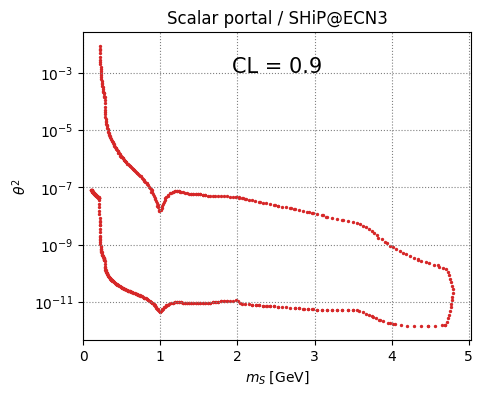

PyObject Text(0.5, 0.92, 'CL = 0.9')

In [9]:
fig, ax = make_plot(title="Scalar portal / SHiP@ECN3", xlabel=raw"$m_S\;[\mathrm{GeV}]$", ylabel=raw"$\theta^2$", figsize=(5,4))
ax.scatter(df.mS, df.theta2, s=2, color="tab:red")
ax.autoscale()
ax.set_xlim(left=0)
#ax.legend()
ax.text(0.5, 0.92, "CL = 0.9", fontsize=15, transform=ax.transAxes, ha="center", va="top")

In [10]:
CSV.write("$(@__DIR__)/../tables/sensitivity/SHiP/SHiP_scalar_sensitivity_CL90_unordered.csv", df)

"/Users/jl/Documents/Research/Projects/SensCalc/Code/SensMC/notebooks/../tables/sensitivity/SHiP/SHiP_scalar_sensitivity_CL90_unordered.csv"